# Fine Data Report 
## Finepayment Data Cologne 2016 & 2018:

The questions that interest us is: "Is there a change in car brands getting in fined or the fines getting paid? Does the car brand correlate with certain fines?"

The analysis helps to answer the question above.
The open source data from Mobilithek (datasets quoted below) of the city of Cologne from the years 2016 and 2018 is used, in particular data of the month january.

### Datasource 1: Bußgelddaten Koeln / Finepayment Data Cologne 2016
* Metadata URL: https://mobilithek.info/offers/-6868803491867755462
* Data URL: https://offenedaten-koeln.de/sites/default/files/Bussgeld_2016.csv
* Data Type: CSV

Data about fine penalty payment in regards of cars in the city in Cologne in january of the year 2016.

### Datasource 2: Bußgelddaten Koeln / Finepayment Data Cologne 2018
* Metadata URL: https://mobilithek.info/offers/-3334718157215585369
* Data URL: https://offenedaten-koeln.de/sites/default/files/Januar_2018.csv
* Data Type: CSV 

Data about fine penalty payment in regards of cars in the city in Cologne in january of the year 2018.


# 1. Data Pipeline

## Install dependencies
Initially, install all required dependencies. The specific version of SQLAlchemy is needed because SQLAlchemy 2.0 does not work with pandas yet. nbformat allows the use of the "notebook" formatter for the plot, others can not be rendered to HTML.

In [2]:
%pip install pandas
%pip install 'SQLAlchemy==1.4.46'
%pip install seaborn
%pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Load data
Extract data from the webpageusing a CSV-Reader from the pandas library. Load it into the sql database "fine_data.sqlite" in the folder "data" using sqlite3. Connect to the sql database and load the dataframes into sql tables.

In [3]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv("https://offenedaten-koeln.de/sites/default/files/Bussgeld_2016.csv", delimiter=";")
df2 = pd.read_csv("https://offenedaten-koeln.de/sites/default/files/Januar_2018.csv", delimiter=";")

sink = sqlite3.connect("../data/fine_data.sqlite")


df1.to_sql("fine16", sink, if_exists="replace", index=False)
df2.to_sql("fine18", sink, if_exists="replace", index=False)

73226

### Testing
Test the absence of mistke by running the bash "test.sh" script which runs the python file "auto_testing.py", that checks the existence of the database and if the data extraction worked. 
A successful data extraction will show this phrase in the command line "Test result: No defects were dected sucessful". 
If the test dected some defects the following phrase will be displayed "Test result: Defects were detected".

### Dataframe 
Create a pandas dataframe using the local sqlite database files.

In [4]:
df16 = pd.read_sql_query('SELECT * FROM fine16', sink)
df18 = pd.read_sql_query('SELECT * FROM fine18', sink)

### Data Cleansing and Transformation
Look at the first few rows and information about the dataset. 
Remove incomplete data and transform the dataseta for further analyzation.

### Dataset 1: 2016

In [5]:
df16.head(10)

,jahr,monat,datum_von,kennzeichen1,fahrzeugart,fabrikat,strasse,hausnummer,tatbestand1,tatbestand2,tatbestand3
0,2016,1,2016-01-21 11:15:00.000,K,PKW,OPEL,FRANKFURTER STR.,70,141322,None,None
1,2016,1,2016-01-21 11:52:00.000,LEV,PKW,OPEL,GRAF-ADOLF-STR.,64,113140,None,None
2,2016,1,2016-01-21 10:28:00.000,K,PKW,JAGUAR,JAN-WELLEM-STR.,None,113140,None,None
3,2016,1,2016-01-21 10:20:00.000,K,PKW,FORD,JAN-WELLEM-STR.,None,113140,None,None
4,2016,1,2016-01-21 09:14:00.000,K,PKW,FORD,JAN-WELLEM-STR.,None,113140,None,None
5,2016,1,2016-01-21 08:33:00.000,K,PKW,VW-VOLKSWAGEN,GRONAUER STR.,43-45,112403,None,None
6,2016,1,2016-01-26 08:00:00.000,K,PKW,RENAULT,JOSEPHSKIRCHSTR.,58,142103,None,None
7,2016,1,2016-01-26 07:24:00.000,K,PKW,FIAT,WIPPERFÜRTHER STR.,None,112402,None,None
8,2016,1,2016-01-25 16:23:00.000,K,PKW,MERCEDES,SIEVERSSTR.,36,141312,None,None
9,2016,1,2016-01-25 16:34:00.000,K,PKW,VOLVO,DILLENBURGER STR.,None,141621,None,None


In [6]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921353 entries, 0 to 921352
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   jahr          921353 non-null  int64 
 1   monat         921353 non-null  int64 
 2   datum_von     921353 non-null  object
 3   kennzeichen1  921338 non-null  object
 4   fahrzeugart   921353 non-null  object
 5   fabrikat      920202 non-null  object
 6   strasse       921353 non-null  object
 7   hausnummer    618864 non-null  object
 8   tatbestand1   921353 non-null  object
 9   tatbestand2   47189 non-null   object
 10  tatbestand3   3605 non-null    object
dtypes: int64(2), object(9)
memory usage: 77.3+ MB


In [7]:
df16.describe()

,jahr,monat
count,921353.0,921353.000000
mean,2016.0,6.400916
std,0.0,3.407937
min,2016.0,1.000000
25%,2016.0,4.000000
50%,2016.0,6.000000
75%,2016.0,9.000000
max,2016.0,12.000000


We only want to use data from the month january so we drop all the other data. At the same time incomplete rows as well as unecessary information is dropped as well.

In [8]:
query = '''
SELECT fahrzeugart AS model,
    fabrikat AS brand,
    strasse AS street, 
    tatbestand1 AS fine,
    monat AS month
FROM fine16;
'''
df2016 = pd.read_sql_query(query, sink)
df2016 = df2016.dropna()
for number in range(2, 13): 
    df2016 = df2016[df2016.month != number]
df2016.head(10)



,model,brand,street,fine,month
0,PKW,OPEL,FRANKFURTER STR.,141322,1
1,PKW,OPEL,GRAF-ADOLF-STR.,113140,1
2,PKW,JAGUAR,JAN-WELLEM-STR.,113140,1
3,PKW,FORD,JAN-WELLEM-STR.,113140,1
4,PKW,FORD,JAN-WELLEM-STR.,113140,1
5,PKW,VW-VOLKSWAGEN,GRONAUER STR.,112403,1
6,PKW,RENAULT,JOSEPHSKIRCHSTR.,142103,1
7,PKW,FIAT,WIPPERFÜRTHER STR.,112402,1
8,PKW,MERCEDES,SIEVERSSTR.,141312,1
9,PKW,VOLVO,DILLENBURGER STR.,141621,1


Decision: Only look at the top 20 fines ("tatbstand1")/(brand).
How often where the brands involved or the fines given to someone?

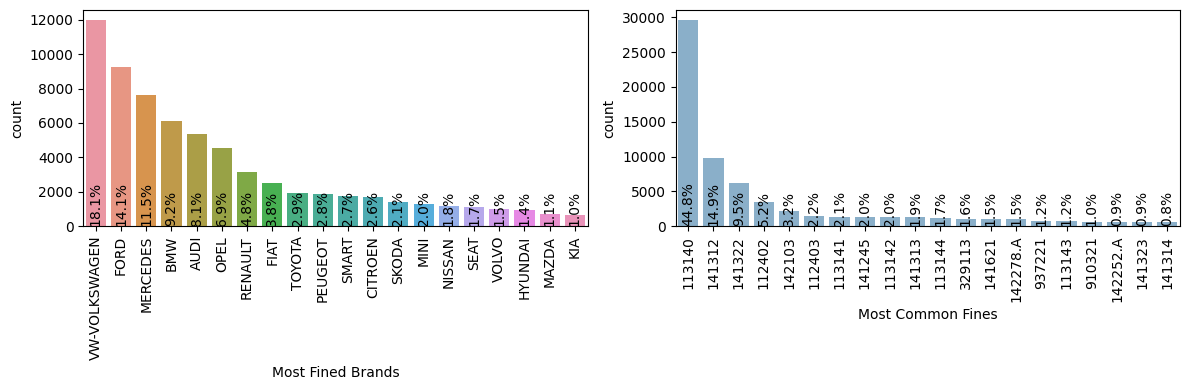

In [23]:
top_fines1 = df2016['fine'].value_counts().head(20).index
top_brands1 = df2016['brand'].value_counts().head(20).index

filtered16 = df2016[df2016['fine'].isin(top_fines1)]
filtered16 = filtered16[filtered16['brand'].isin(top_brands1)]

brand_percentages16 = filtered16['brand'].value_counts(normalize=True) * 100
fine_percentages16 = filtered16['fine'].value_counts(normalize=True) * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='brand', data=filtered16, order=filtered16['brand'].value_counts().index, ax=axes[0])

for i, value in enumerate(brand_percentages16):
    axes[0].text(i, value, f'{value:.1f}%', ha='center', va='bottom', rotation='vertical')

sns.countplot(x='fine', data=filtered16, order=filtered16['fine'].value_counts().index, ax=axes[1], color='#80B1D3')

for j, value in enumerate(fine_percentages16):
    axes[1].text(j, value, f'{value:.1f}%', ha='center', va='bottom', rotation='vertical')

axes[0].set_xlabel('Most Fined Brands')
axes[1].set_xlabel('Most Common Fines')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='vertical')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='vertical')

plt.tight_layout()
plt.show()

The most fined brand in janurary 2016 is "VW-Volkswagen" with 18.1% under the top 20 fined brands followed by "Ford" with 14.1%.
The most common fine in janurary 2016 is "113140" with 44.8% which is a fine for parking without a valid parking ticket ("Sie parkten im Bereich eines Parkscheinautomaten ohne gültigen Parkschein."). The second most common fine is "141312" with 14.9% which is a fine for parking in an absolute no stopping zone ("Sie parkten im absoluten Haltverbot").

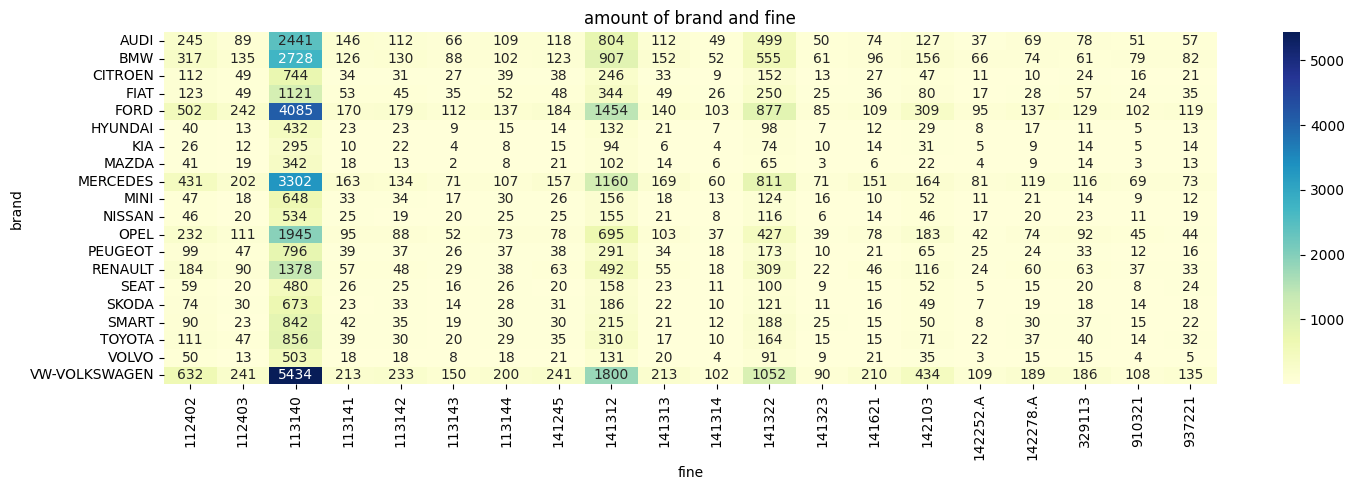

In [10]:
filtered16 = filtered16.groupby(['brand', 'fine']).size().reset_index(name='amount')
filtered16 = filtered16.sort_values('amount', ascending=False)

pivot_table1 = filtered16.pivot_table(values='amount', index='brand', columns='fine', fill_value=0)

plt.figure(figsize=(15, 5))
sns.heatmap(pivot_table1, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('fine')
plt.ylabel('brand')
plt.title('amount of brand and fine')
plt.tight_layout()
plt.show()

The most popular fine in janurary 2016 ticket was "113140" that was given 5434 times to a VW-Volkswagen owner. 

### Dataset 2: 2018

In [11]:
df18.head(10)

,datum_von,kennzeichen1,fahrzeugart,fabrikat,strasse,hausnummer,tatbestand1,tatbestand2,tatbestand3
0,2018-01-06 10:44:00.000,WÜ,PKW,AUDI,GUSTAVSTR.,56,141322,None,None
1,2018-01-06 10:44:00.000,BN,PKW,MAZDA,GUSTAVSTR.,56,141322,None,None
2,2018-01-06 10:38:00.000,NE,PKW,BMW,ZÜLPICHER STR.,311,141322,None,None
3,2018-01-06 10:40:00.000,K,PKW,HONDA,ZÜLPICHER STR.,None,141245,None,None
4,2018-01-29 10:48:00.000,K,PKW,RENAULT,BRÜSSELER STR.,None,113141,None,None
5,2018-01-29 10:48:00.000,BN,PKW,MERCEDES,BRÜSSELER STR.,None,113141,None,None
6,2018-01-29 10:45:00.000,HH,PKW,VW-VOLKSWAGEN,AACHENER STR.,33,141322,None,None
7,2018-01-29 10:32:00.000,K,PKW,AUDI,AACHENER STR.,None,141322,None,None
8,2018-01-29 10:45:00.000,K,PKW,BMW,AACHENER STR.,29,141322,None,None
9,2018-01-05 08:30:00.000,K,PKW,PEUGEOT,SÜLZBURGSTR.,172,141322,None,None


In [12]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73226 entries, 0 to 73225
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datum_von     73226 non-null  object
 1   kennzeichen1  73225 non-null  object
 2   fahrzeugart   73226 non-null  object
 3   fabrikat      73178 non-null  object
 4   strasse       73226 non-null  object
 5   hausnummer    49757 non-null  object
 6   tatbestand1   73226 non-null  object
 7   tatbestand2   4560 non-null   object
 8   tatbestand3   311 non-null    object
dtypes: object(9)
memory usage: 5.0+ MB


In [13]:
df18.describe()

,datum_von,kennzeichen1,fahrzeugart,fabrikat,strasse,hausnummer,tatbestand1,tatbestand2,tatbestand3
count,73226,73225,73226,73178,73226,49757,73226,4560,311
unique,15930,855,15,86,2417,1907,213,118,50
top,2018-01-27 14:20:00.000,K,PKW,VW-VOLKSWAGEN,NEUSSER STR.,1,113140,141312,112042.A
freq,62,43598,71139,12800,2370,1784,27854,1072,89


Incomplete rows as well as unecessary information is dropped.

In [14]:
df18 = df18.drop(["datum_von", "tatbestand2", "tatbestand3","hausnummer", "kennzeichen1"], axis=1)
df18 = df18.dropna()
df18.describe()

,fahrzeugart,fabrikat,strasse,tatbestand1
count,73178,73178,73178,73178
unique,15,86,2416,212
top,PKW,VW-VOLKSWAGEN,NEUSSER STR.,113140
freq,71139,12800,2368,27848


In [15]:
query1 = '''
SELECT fahrzeugart AS model,
    fabrikat AS brand,
    strasse AS street, 
    tatbestand1 AS fine
FROM fine18
WHERE tatbestand1 IN (SELECT tatbestand1 FROM fine18 GROUP BY tatbestand1 ORDER BY COUNT(tatbestand1) desc LIMIT 20);
'''
df2018 = pd.read_sql_query(query1, sink)
df2018 = df2018.dropna()
df2018.head(10)

,model,brand,street,fine
0,PKW,AUDI,GUSTAVSTR.,141322
1,PKW,MAZDA,GUSTAVSTR.,141322
2,PKW,BMW,ZÜLPICHER STR.,141322
3,PKW,HONDA,ZÜLPICHER STR.,141245
4,PKW,RENAULT,BRÜSSELER STR.,113141
5,PKW,MERCEDES,BRÜSSELER STR.,113141
6,PKW,VW-VOLKSWAGEN,AACHENER STR.,141322
7,PKW,AUDI,AACHENER STR.,141322
8,PKW,BMW,AACHENER STR.,141322
9,PKW,PEUGEOT,SÜLZBURGSTR.,141322


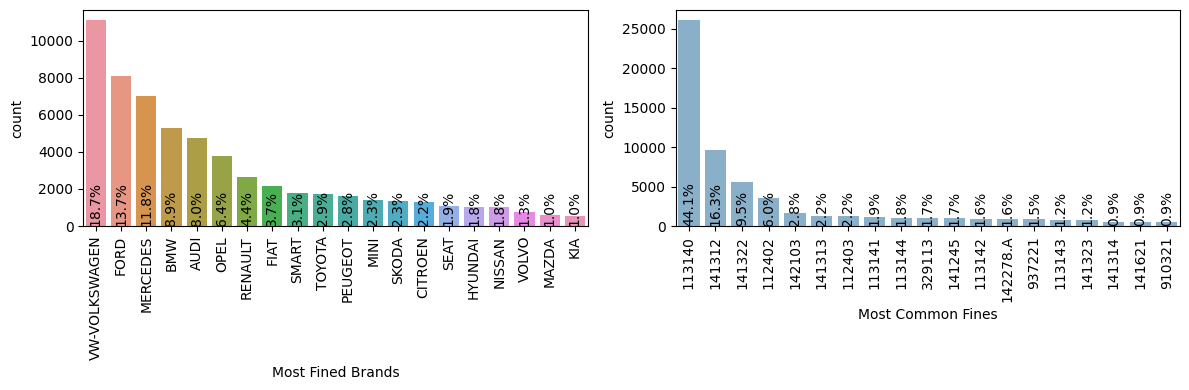

In [30]:
top_fines = df2018['fine'].value_counts().head(20).index
top_brands = df2018['brand'].value_counts().head(20).index

filtered18 = df2018[df2018['fine'].isin(top_fines1)]
filtered18 = filtered18[filtered18['brand'].isin(top_brands1)]

brand_percentages18 = filtered18['brand'].value_counts(normalize=True) * 100
fine_percentages18 = filtered18['fine'].value_counts(normalize=True) * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='brand', data=filtered18, order=filtered18['brand'].value_counts().index, ax=axes[0])

for t, value in enumerate(brand_percentages18):
    axes[0].text(t, value, f'{value:.1f}%', ha='center', va='bottom', rotation='vertical')

sns.countplot(x='fine', data=filtered18, order=filtered18['fine'].value_counts().index, ax=axes[1], color='#80B1D3')

for g, value in enumerate(fine_percentages18):
    axes[1].text(g, value, f'{value:.1f}%', ha='center', va='bottom', rotation='vertical')

axes[0].set_xlabel('Most Fined Brands')
axes[1].set_xlabel('Most Common Fines')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='vertical')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='vertical')

plt.tight_layout()
plt.show()

The most fined brand in janurary 2018 is "VW-Volkswagen" with 18.7% under the top 20 fined brands followed by "Ford" with 13.7%.
The most common fine janurary 2018 is "113140" with 44.1% which is a fine for parking without a valid parking ticket ("Sie parkten im Bereich eines Parkscheinautomaten ohne gültigen Parkschein."). The second most common fine is "141312" with 16.3% which is a fine for parking in an absolute no stopping zone ("Sie parkten im absoluten Haltverbot").

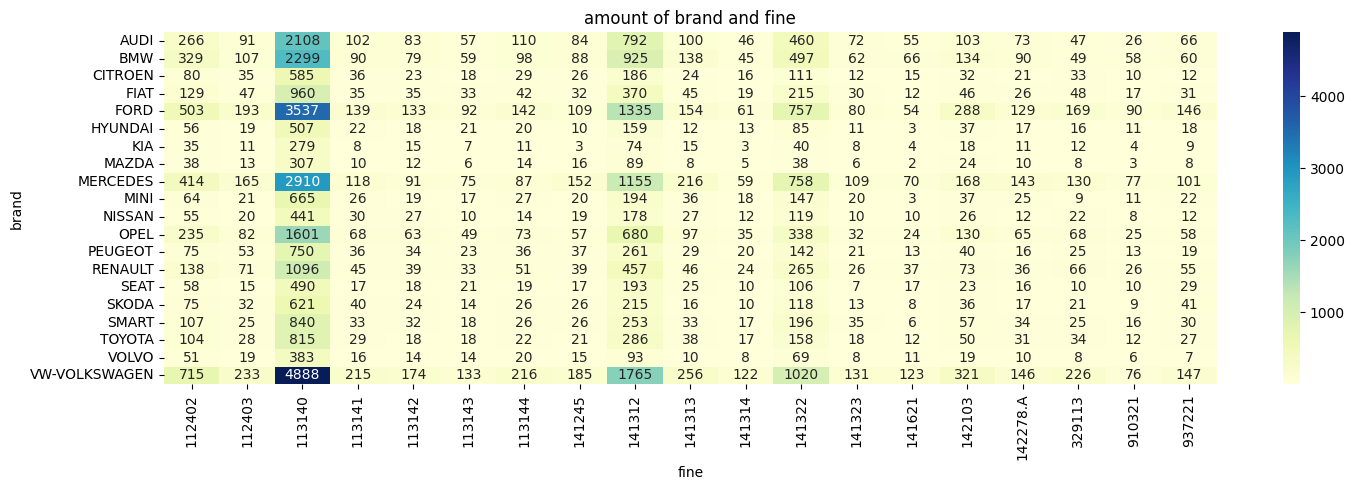

In [18]:
filtered18 = filtered18.groupby(['brand', 'fine']).size().reset_index(name='amount')
filtered18 = filtered18.sort_values('amount', ascending=False)

pivot_table = filtered18.pivot_table(values='amount', index='brand', columns='fine', fill_value=0)

plt.figure(figsize=(15, 5))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('fine')
plt.ylabel('brand')
plt.title('amount of brand and fine')
plt.tight_layout()
plt.show()

The most popular fine in janurary 2018 ticket was "113140" that was given 4888 times to a VW-Volkswagen owner. 

## Did something change from 2016 to 2018?

Analyze the differences between the most fined brands and the most common fines.

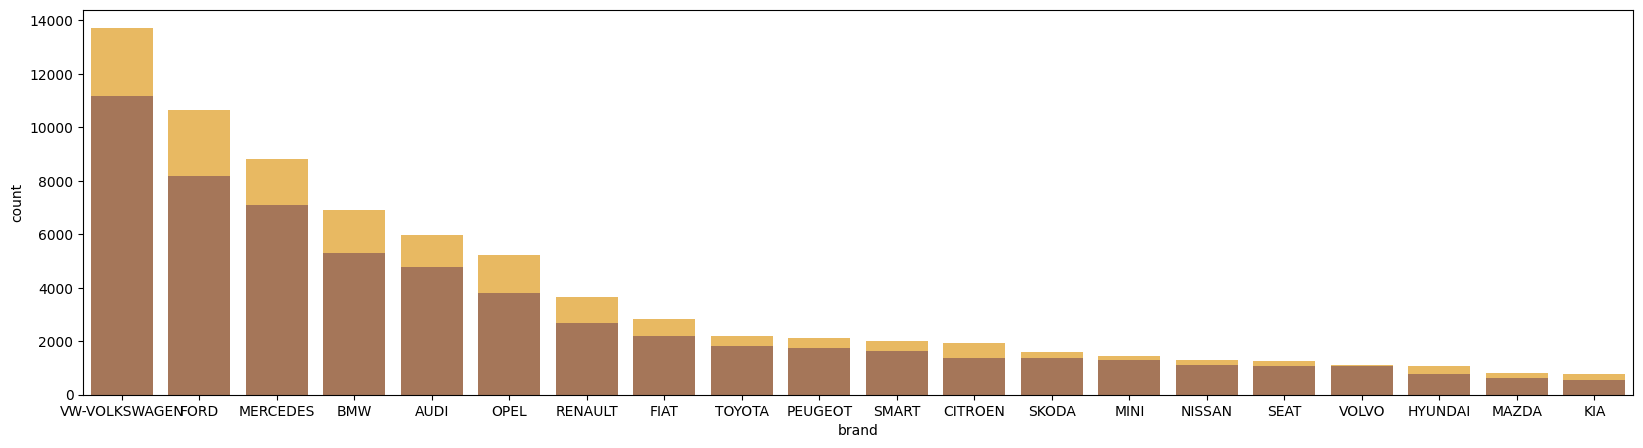

In [34]:
f, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='brand', data=df2018, order=df2018['brand'].value_counts().head(20).index, color='blue')
sns.countplot(x='brand', data=df2016, order=df2016['brand'].value_counts().head(20).index, color='orange', alpha=0.7)

plt.show()

Overall the top 20 brands got more fined in 2016 compared to 2018 in absolute figures.

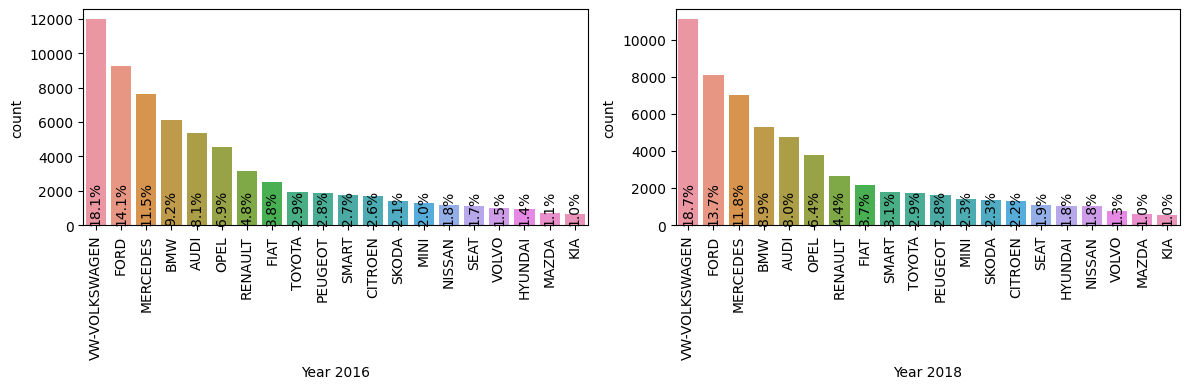

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='brand', data=filtered16, order=filtered16['brand'].value_counts().index, ax=axes[0])

for k, value in enumerate(brand_percentages16):
    axes[0].text(k, value, f'{value:.1f}%', ha='center', va='bottom', rotation='vertical')

sns.countplot(x='brand', data=filtered18, order=filtered18['brand'].value_counts().index, ax=axes[1])

for z, value in enumerate(brand_percentages18):
    axes[1].text(z, value, f'{value:.1f}%', ha='center', va='bottom', rotation='vertical')

axes[0].set_xlabel('Year 2016')
axes[1].set_xlabel('Year 2018')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='vertical')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='vertical')

plt.tight_layout()
plt.show()

The overall picture did not change much from 2016 to 2018. In 2018 its still the same top 20 brands to get fined as in 2016 only the percentages changed a little bit over the years. 
In general was the share of the top 20 car brands to get a fine higher in 2016 compared to 2018.

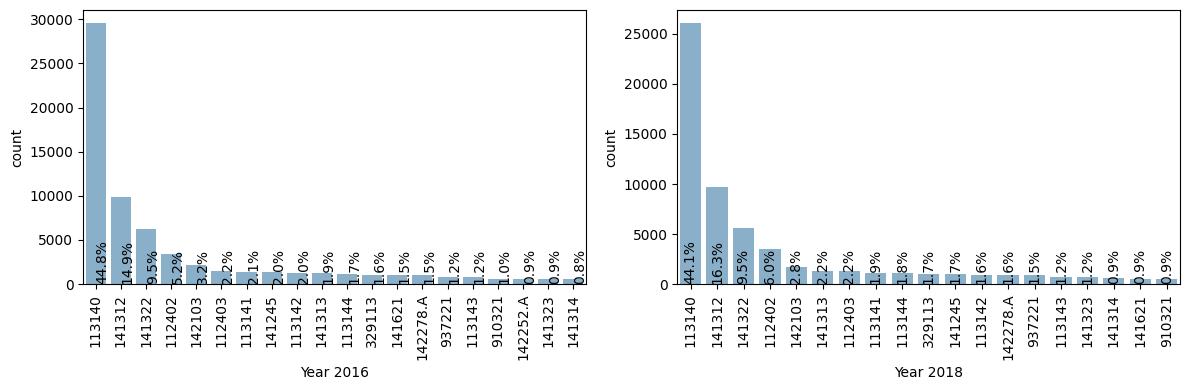

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='fine', data=filtered16, order=filtered16['fine'].value_counts().index, ax=axes[0], color='#80B1D3')

for n, value in enumerate(fine_percentages16):
    axes[0].text(n, value, f'{value:.1f}%', va='bottom', rotation='vertical')

sns.countplot(x='fine', data=filtered18, order=filtered18['fine'].value_counts().index, ax=axes[1], color='#80B1D3')

for p, value in enumerate(fine_percentages18):
    axes[1].text(p, value, f'{value:.1f}%', ha='center', va='bottom', rotation='vertical')

axes[0].set_xlabel('Year 2016')
axes[1].set_xlabel('Year 2018')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='vertical')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='vertical')

plt.tight_layout()
plt.show()

The most common fines charged changed a little bit over the two years. In general in 2018 were way less fine charged. Some fines were not charged as often as in 2016 or even more compared to the other fines. The fine '141324' was under the top 20 in 2016, but in 2018 it is not now it is '141106.B'.
'141324' is the fine "Sie parkten unzulässig länger als 1 Stunde im eingeschränkten Haltverbot", parking longer than an hour in restricted parking area.
'141106.B' is the fine "Sie parkten in einem Fußgängerbereich, der durch Zeichen (239, 242/243) gesperrt war.", parking in an area for pedestrians.
In 2018 the share of the top 20 fine is a little bit less compared to 2016.

## Conclusion
To answer our initial question "Is there a change in car brands getting in fined or the fines getting paid? Is there a change in the most common fines?", an open source dataset from Mobilithek of the fine payment data of january 2016 and 2018 was used. 

### Findings 
The top 20 of brands and fines both reduced from 2016 to 2018. This might be attributable to less controls in 2018 than in 2016. 
A recommandation to the city of Cologne could be to increase controls again and fine misdemeanor accordingly.

### Limitations
Since the dataset did only hold nominal data it was not possible to analyze statistical values like mean, correlation, varianz, minimum or maximum. 
Besides the data features itself, only data from on month of the year was evaluated. To support the findings the data of different years should be considered as well as maybe looking at other months or the whole year.
Another thing to point out is the completeness of the data and its quality might effect the validity of the findings.
